In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [2]:
points = np.vstack(((np.random.randn(150, 2) * 0.75 + np.array([1, 0])),
                  (np.random.randn(50, 2) * 0.25 + np.array([-0.5, 0.5])),
                  (np.random.randn(50, 2) * 0.5 + np.array([-0.5, -0.5]))))

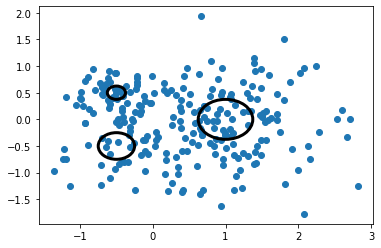

In [3]:
plt.scatter(points[:, 0], points[:, 1]);
ax = plt.gca();
ax.add_artist(plt.Circle(np.array([1, 0]), 0.75/2, fill=False, lw=3));
ax.add_artist(plt.Circle(np.array([-0.5, 0.5]), 0.25/2, fill=False, lw=3));
ax.add_artist(plt.Circle(np.array([-0.5, -0.5]), 0.5/2, fill=False, lw=3));

Functions to create for k-means algorithm:
1. Select "k" centroids (Random Initialization)
2. Calculate closest centroid to each point
3. Move centroids after calculation

In [4]:
def initialize_centroids(points, k):
    '''
    Function to randomly initialize k centroids
    Inputs -
        points - all the points in dataset
        k - number of centroids to be generated
    Output - 
        "k" number of randomly generated centroids
    '''
    centroids = np.copy(points)
    np.random.shuffle(centroids)
    
    return centroids[:k]

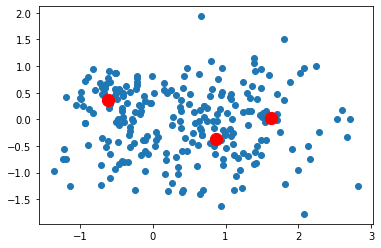

In [5]:
#To ensure random initialization, run multiple times
plt.scatter(points[:, 0], points[:, 1]);
centroids = initialize_centroids(points, 3)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=150);

In [6]:
def closest_centroids(points, centroids):
    '''
    For each point, calculate the closest centroid to it
    Inputs -
        points - dataset
        centroids - calculate from initialize_centroids
    Outputs - 
        Indexes of the closest centroid for each point
    '''
    
    #Using broadcasting introduce a new np.newaxis
    #in order to calculate the distances of each points from centroids
    distances = (points - centroids[:,np.newaxis,:])**2
    
    #summing distance over the axis that gives us dimensions 3x250 or 250x3
    #since we need the distance of each point to the centroids
    #finally np.argmin gives us the index of the closest centroid
    #for this the dimensions need to be (250,1) or (250,)
    closest = np.argmin(distances.sum(axis=2), axis=0)
    
    return closest

In [7]:
def move_centroids(points, centroids, closest):
    '''
    Move centroids to new mean location based on the average of closest points
    Inputs -
        points - dataset
        centroids - initialized before
        closest - indexes of points closest to centroids 0,1,2, etc.
    Outputs -
        new_centroids - New set of centroids
    '''
    
    #for k in range(centroids.shape[0]) ensures we run the loop for number of centroids present
    #points[closest==k] finds points where it's value is either 0,1, etc. in the loop
    #mean over axis 0 gives us the shape (3,1) overall
    #which are the new centroid means
    new_centroids = np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])
    
    return new_centroids

In [8]:
def has_centroid_moved(old_centroids, new_centroids):
    '''
    Find if centroid has moved or not to terminate the code
    Inputs -
        old_centroids - Old set of centroids
        new_centroids - New set of centoids calculated from move_centroids
    Outputs -
        boolean - 
            True if difference<=threshold
            False if difference>threshold
    '''
    
    #calculate the euclidean distance between two arrays
    #removing the square root gives more precision
    centroids_moved = ((new_centroids-old_centroids)**2).sum(axis=1)
    
    # if centroids have very little movement
    #return True
    if centroids_moved.all()<=0:
        return True
    
    return False

In [9]:
def k_means_main(points, k=3):
    
    '''
    Main executable function of k-means algorithm
    Puts all the functions together and returns the new centroids
    with the new scatter plot
    Inputs -
        points - dataset
        k - number of clusters/centroids
    '''
    
    #initialize centroids and has_centroid_moved variable
    centroids = initialize_centroids(points, k)
    centroid_moved = False
    
    while not centroid_moved:
        #move centroids to closest points
        closest = closest_centroids(points, centroids)
        new_centroids = move_centroids(points, centroids, closest)

        centroid_moved = has_centroid_moved(centroids, new_centroids)
        centroids = new_centroids
    return new_centroids

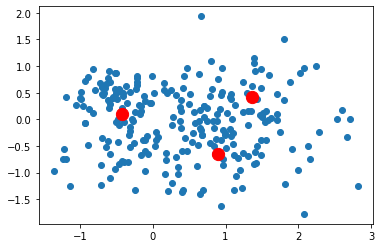

In [10]:
#To ensure random initialization, run multiple times
plt.scatter(points[:, 0], points[:, 1]);
centroids = k_means_main(points, 3)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=150);

Based on the initialization, the centroids may change a bit, but they almost always have the same positions.